In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
r = readers.CollectionReader('../src/kl_sweep/agents')

100%|██████████| 360/360 [00:58<00:00,  6.11it/s]


In [3]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
#nadv = r.df('normalized_advantage')
#nadv['opt_step'] = (nadv.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [4]:
games =  ["Walker2d-v2", "Hopper-v2", "HalfCheetah-v2", "Humanoid-v2"]
code_level_opts = {
      "ppo_lr_adam": [3e-4],
      "kl_penalty_coeff": [2., 3., 5.],
      "ppo_epochs": [10, 20, 40],
      "kl_penalty_direction": ["new_to_old", "old_to_new"],
      #'clip_advantages': [1e8],
      #'norm_rewards': ['none', 'returns'],
      #'anneal_lr': [False, True],
      #'value_clipping': [False, True],
      #'initialization': ['xavier', 'orthogonal']
}

NUM_BINS = 20

In [5]:
metadata['kl_penalty'] = (metadata['kl_penalty_coeff'] > 0)
metadata['clip'] = (metadata['clip_eps'] < 1)
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
constraints = constraints.merge(key_metadata, on='exp_id')
constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

In [2]:
def filter_opts(df, **kwargs):
    for k, v in kwargs.items():
        df = df[df[k] == v]
    return df

# Plot mean rewards

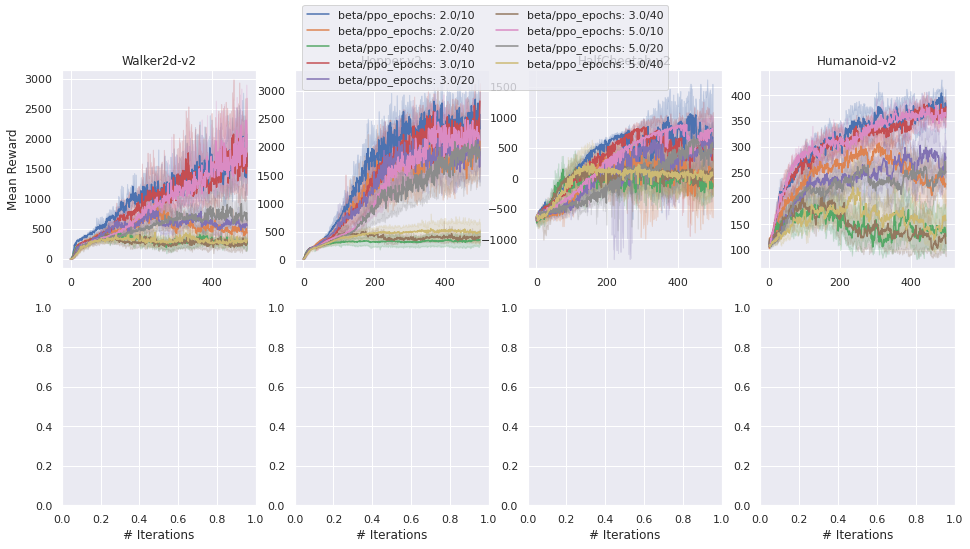

In [8]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for c in code_level_opts['kl_penalty_coeff']:
        for k in code_level_opts['ppo_epochs']:
            filt = filter_opts(opt, kl_penalty_coeff=c, ppo_epochs=k, game=g)
            sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                         ax=ax.flatten()[j], label=f"beta/ppo_epochs: {c}/{k}", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

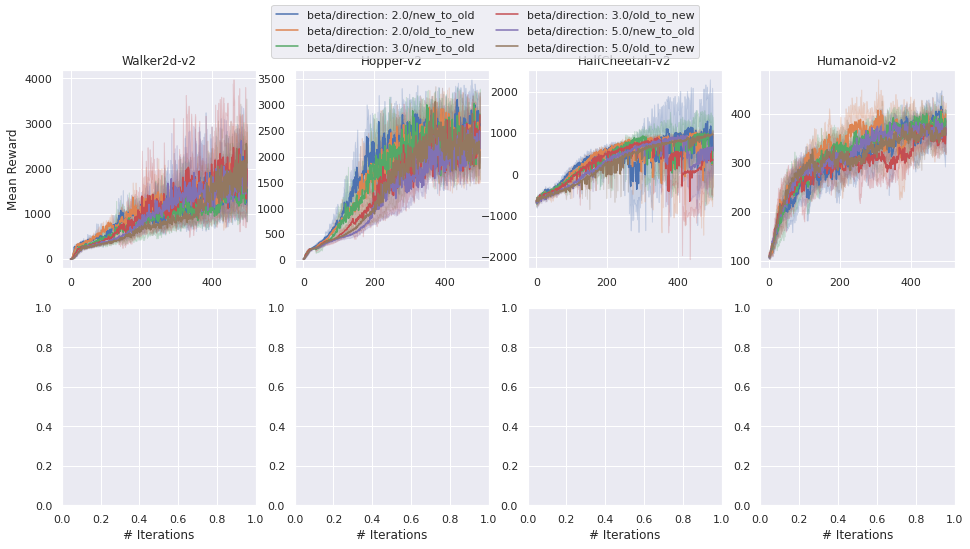

In [9]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for c in code_level_opts['kl_penalty_coeff']:
        for d in code_level_opts['kl_penalty_direction']:
            filt = filter_opts(opt, ppo_epochs=10, kl_penalty_coeff=c, kl_penalty_direction=d, game=g)
            sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                         ax=ax.flatten()[j], label=f"beta/direction: {c}/{d}", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

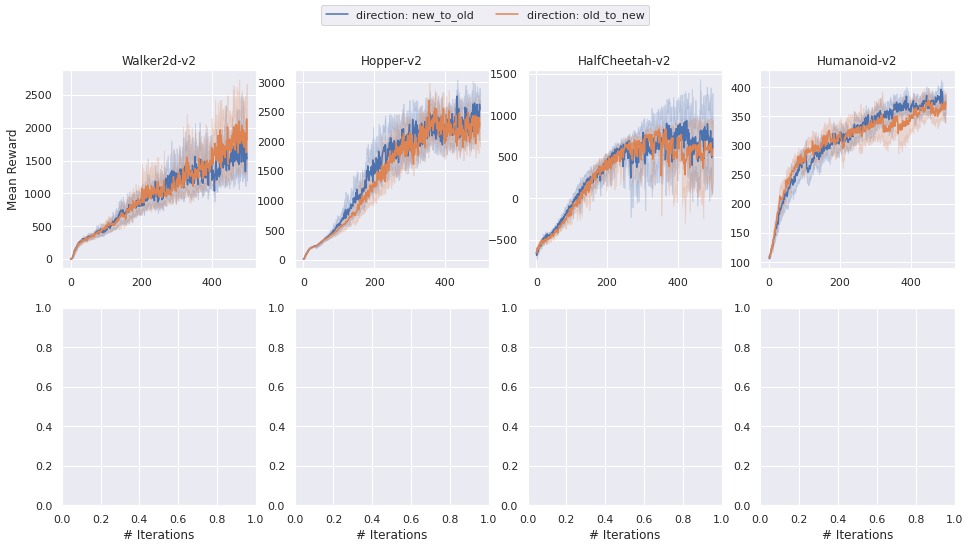

In [11]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for d in code_level_opts['kl_penalty_direction']:
        filt = filter_opts(opt, ppo_epochs=10, kl_penalty_direction=d, game=g)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"direction: {d}", legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

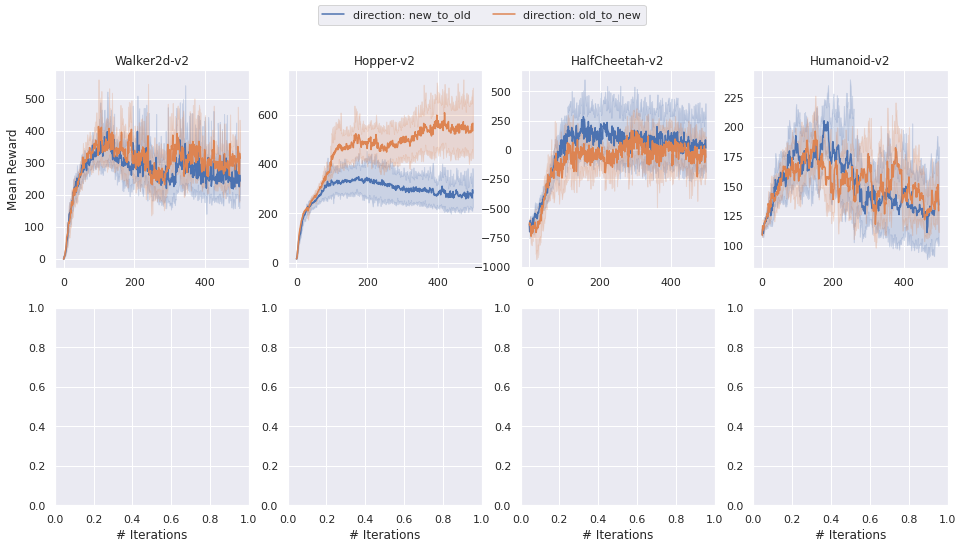

In [12]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for d in code_level_opts['kl_penalty_direction']:
        filt = filter_opts(opt, ppo_epochs=40, kl_penalty_direction=d, game=g)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"direction: {d}", legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

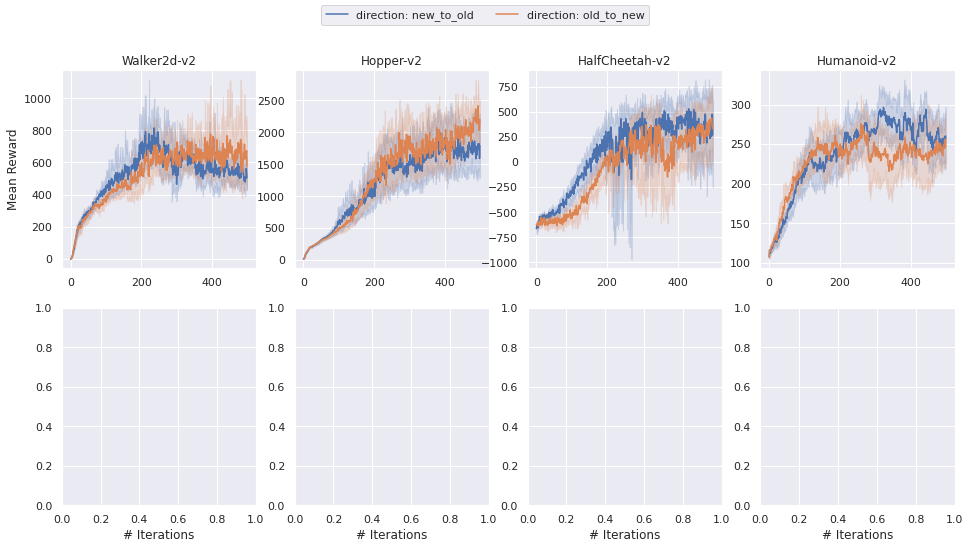

In [13]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for d in code_level_opts['kl_penalty_direction']:
        filt = filter_opts(opt, ppo_epochs=20, kl_penalty_direction=d, game=g)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"direction: {d}", legend=False)
    ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

In [14]:
filt = filter_opts(constraints_heldout, kl_penalty_direction='new_to_old', ppo_epochs=10)

In [15]:
filt.head()

,avg_kl_old_to_new,avg_kl_new_to_old,avg_ratio,avg_rat_minus_one_sq,max_ratio,opt_step,exp_id,game,ppo_lr_adam,kl_penalty_coeff,ppo_epochs,kl_penalty_direction
0,0.012167,0.012061,1.001063,0.024179,1.935220,0,a5d0f09d-ef58-4cd2-a581-883a13580165,Walker2d-v2,0.0003,2.0,10,new_to_old
1,0.007752,0.007667,0.997994,0.014354,1.574195,10,a5d0f09d-ef58-4cd2-a581-883a13580165,Walker2d-v2,0.0003,2.0,10,new_to_old
2,0.009943,0.009988,1.003077,0.020975,2.321399,20,a5d0f09d-ef58-4cd2-a581-883a13580165,Walker2d-v2,0.0003,2.0,10,new_to_old
3,0.006914,0.006886,1.004867,0.013125,1.772853,30,a5d0f09d-ef58-4cd2-a581-883a13580165,Walker2d-v2,0.0003,2.0,10,new_to_old
4,0.005628,0.005584,0.998138,0.010947,1.561571,40,a5d0f09d-ef58-4cd2-a581-883a13580165,Walker2d-v2,0.0003,2.0,10,new_to_old


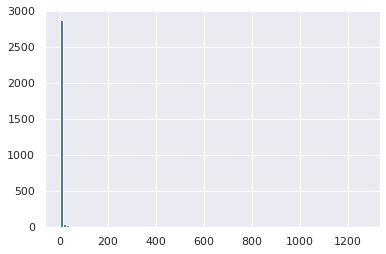

In [16]:
plt.hist(filt.max_ratio, bins=100)
plt.show()

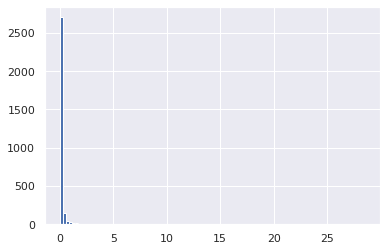

In [17]:
plt.hist(np.sqrt(filt.avg_rat_minus_one_sq), bins=100)
plt.show()

In [18]:
filt = filter_opts(constraints_heldout, ppo_epochs=10, kl_penalty_direction='old_to_new')

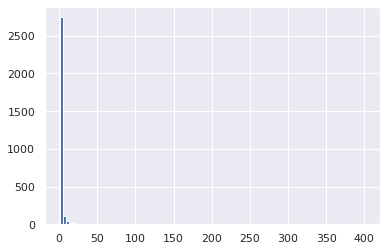

In [19]:
plt.hist(filt.max_ratio, bins=100)
plt.show()

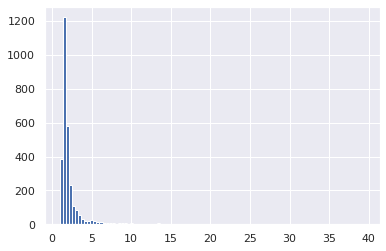

In [20]:
plt.hist(filt[filt.max_ratio < 40].max_ratio, bins=100)
plt.show()

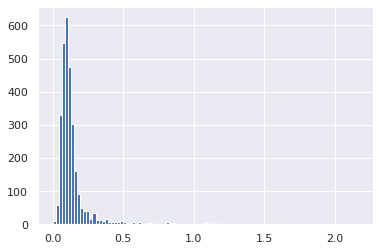

In [21]:
plt.hist(np.sqrt(filt[filt.max_ratio < 40].avg_rat_minus_one_sq), bins=100)
plt.show()

## Plot Mean Std

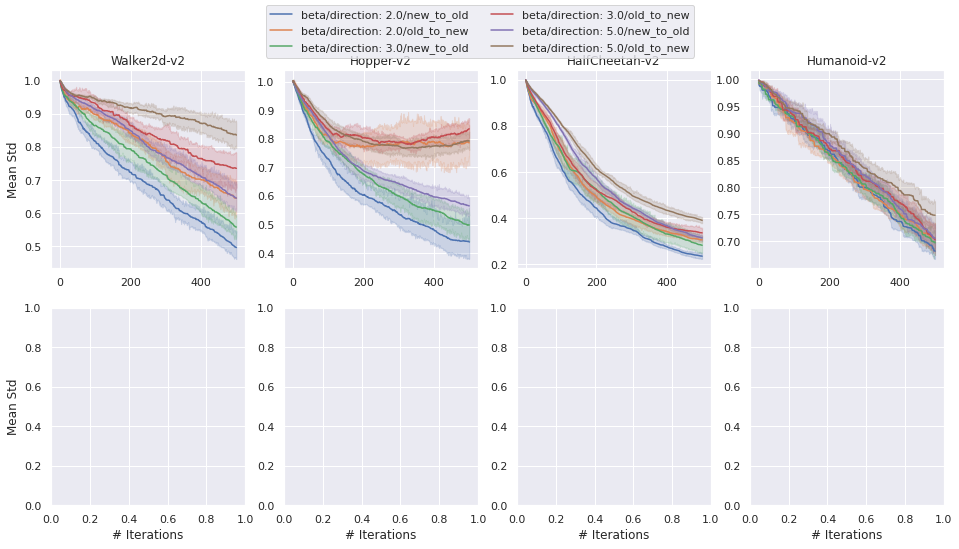

In [22]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for c in code_level_opts['kl_penalty_coeff']:
        for d in code_level_opts['kl_penalty_direction']:
            filt = filter_opts(opt, ppo_epochs=10, kl_penalty_coeff=c, kl_penalty_direction=d, game=g)
            sns.lineplot(filt.opt_step, filt.mean_std, n_boot=100,
                         ax=ax.flatten()[j], label=f"beta/direction: {c}/{d}", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Std')
ax[1][0].set_ylabel('Mean Std')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

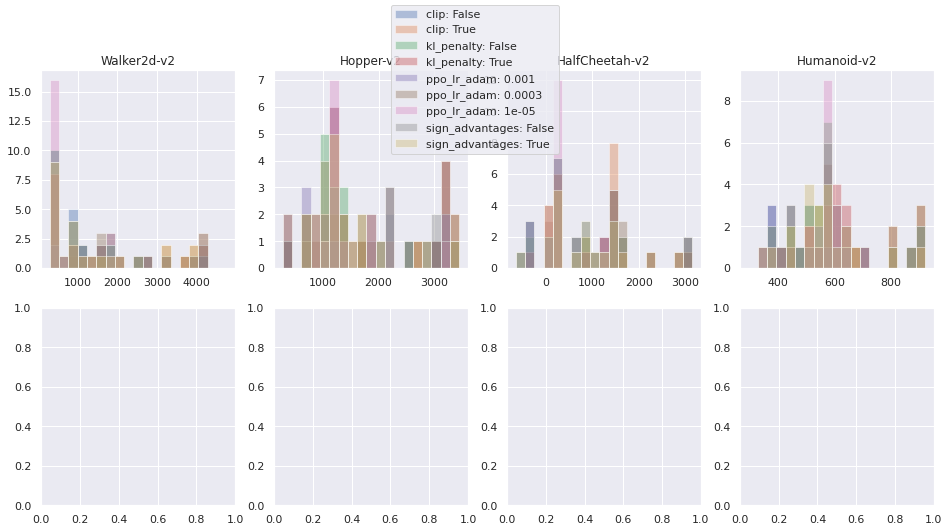

In [26]:
max_rewards = opt.groupby(['exp_id', 'game'] + list(code_level_opts.keys())).max()
max_rewards = max_rewards.reset_index()

# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    # Histogram setup
    _, bin_edges = np.histogram(max_rewards[max_rewards.game == g][
        'mean_reward'].tolist(), NUM_BINS)
    bin_locs = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_ws = (bin_edges[1] - bin_edges[0])
    kwargs = {'width': bin_ws, 'alpha': 0.65}
    
    for i, cl_opt in enumerate(code_level_opts):
        for ib, b in enumerate(code_level_opts[cl_opt]):
            filt = max_rewards[(max_rewards[cl_opt] == b) & (max_rewards.game == g)]
            #hist, _ = np.histogram(filt['mean_reward'].tolist(), bin_edges)
            #hist = np.flip(np.cumsum(np.flip(hist))) / np.sum(hist)
            sns.distplot(filt['mean_reward'].tolist(),
                         bins=bin_locs, label=f"{cl_opt}: {b}", ax=ax.flatten()[j], kde=False)
        ax.flatten()[j].set_title(g)
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
plt.show()

# Aggregate performance in normalized scores

In [27]:
max_and_min = max_rewards[['game', 'mean_reward']].groupby('game').max().rename(
    columns={'mean_reward': 'max_max_reward'})
max_and_min['min_max_reward'] = max_rewards[['game', 'mean_reward']].groupby('game').min()

In [28]:
ks = ['game'] + list(code_level_opts.keys())
grouped = max_rewards[ks + ['mean_reward']].groupby(ks).mean().reset_index().set_index(ks)
grouped = grouped.rename(columns={'mean_reward': 'mean_max_reward'})
grouped['stddev'] = max_rewards[ks + ['mean_reward']].groupby(ks).var().reset_index().set_index(ks).apply(np.sqrt)
grouped = grouped.reset_index()
grouped = grouped.reset_index().merge(max_and_min, on='game')
grouped = grouped.set_index(ks)
grouped['normalized_score'] = (grouped['mean_max_reward'] - grouped['min_max_reward']) / (
    grouped['max_max_reward'] - grouped['min_max_reward'])
grouped['normalized_stddev'] = grouped['stddev'] / (
    grouped['max_max_reward'] - grouped['min_max_reward'])
grouped = grouped.dropna()
grouped

index  \
game           clip  kl_penalty ppo_lr_adam sign_advantages          
HalfCheetah-v2 False False      0.00001     False                0   
                                            True                 1   
                                0.00030     False                2   
                                            True                 3   
                                0.00100     False                4   
...                                                            ...   
Walker2d-v2    True  True       0.00001     True                91   
                                0.00030     False               92   
                                            True                93   
                                0.00100     False               94   
                                            True                95   

                                                             mean_max_reward  \
game           clip  kl_penalty ppo_lr_adam sign_advantages                    
HalfCheetah-v2 False False      0.00001     False                 227.855136   
                                            True                  195.888717   
                                0.00030     False                2357.557118   
                                            True                  792.852366   
                                0.00100     False                -429.825836   
...                                                                      ...   
Walker2d-v2    True  True       0.00001     True                  414.088843   
                                0.00030     False                4481.764320   
                                            True                 2633.627632   
                                0.00100     False                2974.598133   
                                            True                 3554.140936   

                                                                  stddev  \
game           clip  kl_penalty ppo_lr_adam sign_advantages                
HalfCheetah-v2 False False      0.00001     False              10.183946   
                                            True               44.150226   
                                0.00030     False            1119.987693   
                                            True               36.897182   
                                0.00100     False               3.159637   
...                                                                  ...   
Walker2d-v2    True  True       0.00001     True                5.166492   
                                0.00030     False             539.334918   
                                            True             1412.717789   
                                0.00100     False            1575.946527   
                                            True              431.397740   

                                                             max_max_reward  \
game           clip  kl_penalty ppo_lr_adam sign_advantages                   
HalfCheetah-v2 False False      0.00001     False               3253.085733   
                                            True                3253.085733   
                                0.00030     False               3253.085733   
                                            True                3253.085733   
                                0.00100     False               3253.085733   
...                                                                     ...   
Walker2d-v2    True  True       0.00001     True                4863.131698   
                                0.00030     False               4863.131698   
                                            True                4863.131698   
                                0.00100     False               4863.131698   
                                            True                4863.131698   

                                                             min_max_reward  \
game         

In [43]:
filter_opts(grouped.reset_index(), ppo_lr_adam=3e-4, sign_advantages=False)

,game,clip,kl_penalty,ppo_lr_adam,sign_advantages,index,mean_max_reward,stddev,max_max_reward,min_max_reward,normalized_score,normalized_stddev
2,HalfCheetah-v2,False,False,0.0003,False,2,2357.557118,1119.987693,3253.085733,-748.608531,0.776213,0.279878
8,HalfCheetah-v2,False,True,0.0003,False,8,3160.587861,130.811746,3253.085733,-748.608531,0.976885,0.032689
14,HalfCheetah-v2,True,False,0.0003,False,14,1554.914724,150.110636,3253.085733,-748.608531,0.575637,0.037512
20,HalfCheetah-v2,True,True,0.0003,False,20,1482.646329,25.598382,3253.085733,-748.608531,0.557578,0.006397
26,Hopper-v2,False,False,0.0003,False,26,2001.441875,861.197042,3529.594634,201.381579,0.540849,0.258757
32,Hopper-v2,False,True,0.0003,False,32,3300.261968,324.325366,3529.594634,201.381579,0.931094,0.097447
38,Hopper-v2,True,False,0.0003,False,38,2013.452536,1817.887965,3529.594634,201.381579,0.544458,0.546205
44,Hopper-v2,True,True,0.0003,False,44,1810.582922,2005.876859,3529.594634,201.381579,0.483503,0.602689
50,Humanoid-v2,False,False,0.0003,False,50,463.244582,9.841052,936.059183,279.950773,0.279365,0.014999
56,Humanoid-v2,False,True,0.0003,False,56,481.370275,80.966483,936.059183,279.950773,0.306991,0.123404


# Gamma and Lambda

In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
r = readers.CollectionReader('../src/gamma_debug/agents')

100%|██████████| 6/6 [00:00<00:00,  8.83it/s]


In [3]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
#nadv = r.df('normalized_advantage')
#nadv['opt_step'] = (nadv.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [4]:
games =  ["Humanoid-v2"]
code_level_opts = {
      "gamma": [0.99, 0.995, 0.999],
      'norm_rewards': ['none', 'returns'],
}

NUM_BINS = 20

In [5]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
constraints = constraints.merge(key_metadata, on='exp_id')
constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

In [6]:
def filter_opts(df, **kwargs):
    for k, v in kwargs.items():
        df = df[df[k] == v]
    return df

# Plot mean rewards

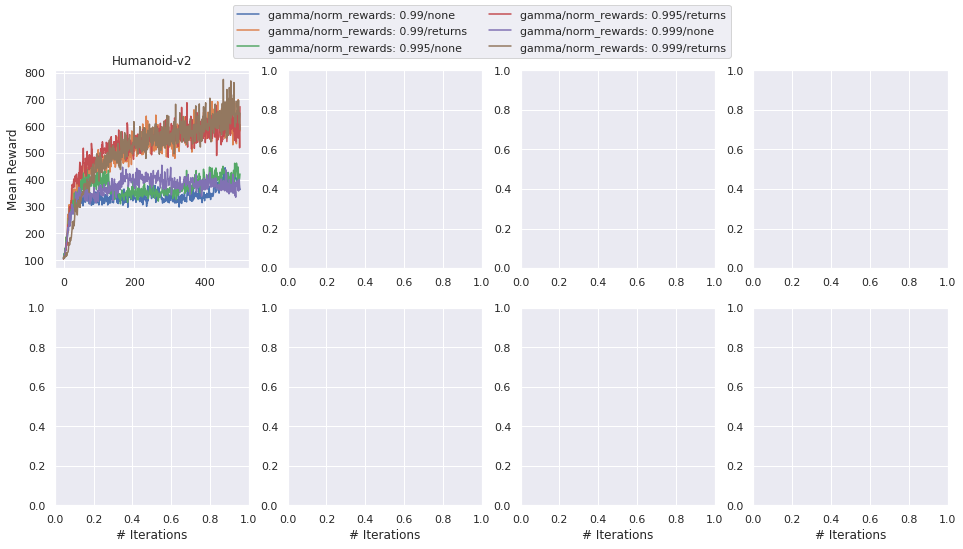

In [8]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for c in code_level_opts['gamma']:
        for k in code_level_opts['norm_rewards']:
            filt = filter_opts(opt, gamma=c, norm_rewards=k, game=g)
            sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                         ax=ax.flatten()[j], label=f"gamma/norm_rewards: {c}/{k}", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

In [9]:
r = readers.CollectionReader('../src/debug_reward/agents')

100%|██████████| 4/4 [00:00<00:00,  4.06it/s]


In [10]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
#nadv = r.df('normalized_advantage')
#nadv['opt_step'] = (nadv.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [11]:
games =  ["Humanoid-v2"]
code_level_opts = {
      "lambda": [0.0],
      'norm_rewards': ['none', 'returns'],
}

NUM_BINS = 20

In [12]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
constraints = constraints.merge(key_metadata, on='exp_id')
constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

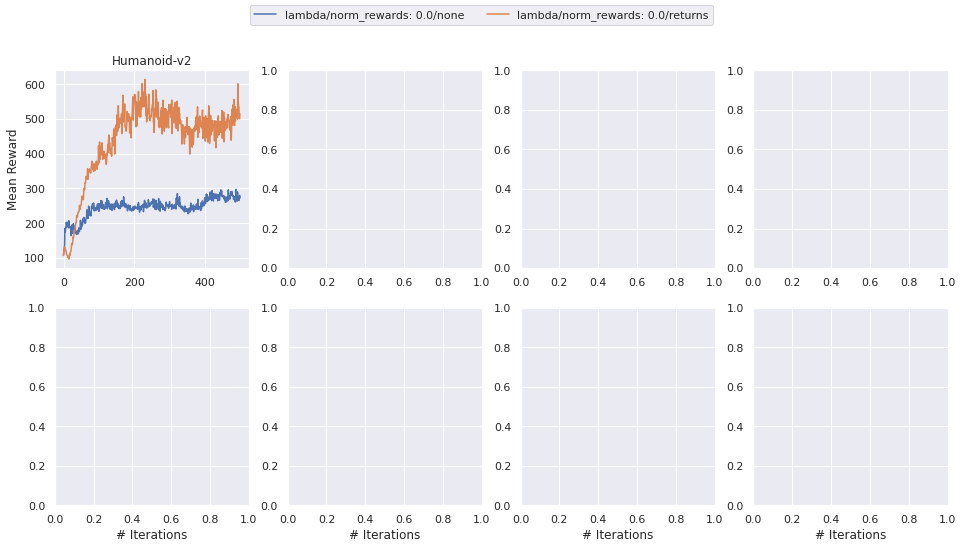

In [16]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for c in code_level_opts['lambda']:
        for k in code_level_opts['norm_rewards']:
            filt = filter_opts(opt, **{'lambda':c, 'norm_rewards':k, 'game':g})
            sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                         ax=ax.flatten()[j], label=f"lambda/norm_rewards: {c}/{k}", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

In [17]:
r = readers.CollectionReader('../src/reward_different_scaling/agents')

100%|██████████| 10/10 [00:01<00:00,  7.17it/s]


In [18]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
#nadv = r.df('normalized_advantage')
#nadv['opt_step'] = (nadv.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [19]:
games =  ["Humanoid-v2", "Walker2d-v2"]
code_level_opts = {
      "lambda": [0.0],
      'norm_rewards': ['rewards'],
}

NUM_BINS = 20

In [20]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
constraints = constraints.merge(key_metadata, on='exp_id')
constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

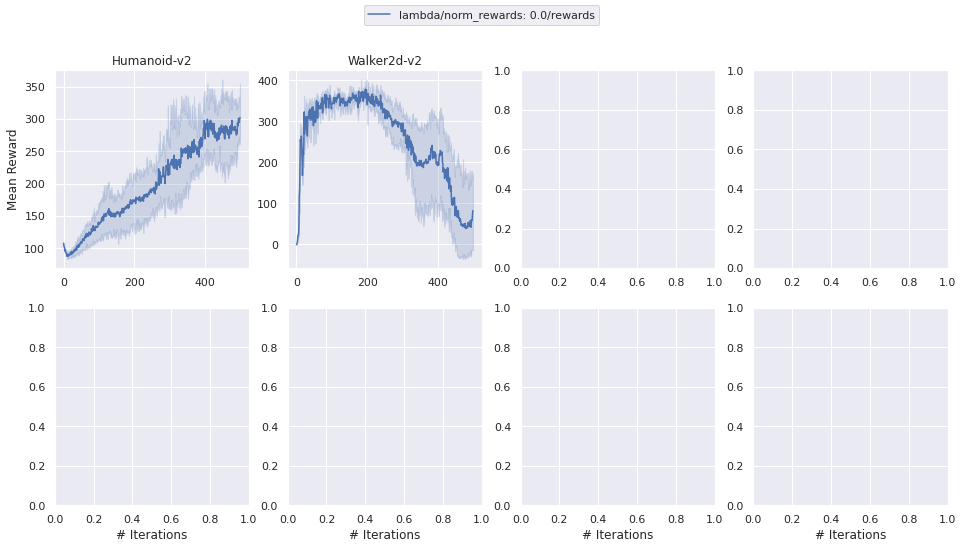

In [21]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for c in code_level_opts['lambda']:
        for k in code_level_opts['norm_rewards']:
            filt = filter_opts(opt, **{'lambda':c, 'norm_rewards':k, 'game':g})
            sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                         ax=ax.flatten()[j], label=f"lambda/norm_rewards: {c}/{k}", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

In [22]:
r = readers.CollectionReader('../src/reward_const_scale/agents')

100%|██████████| 10/10 [00:01<00:00,  7.95it/s]


In [24]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index

In [25]:
games =  ["Humanoid-v2", "Walker2d-v2"]
code_level_opts = {
      'norm_rewards': ['constant'],
}

NUM_BINS = 20

In [26]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
opt = opt.merge(key_metadata, on='exp_id')

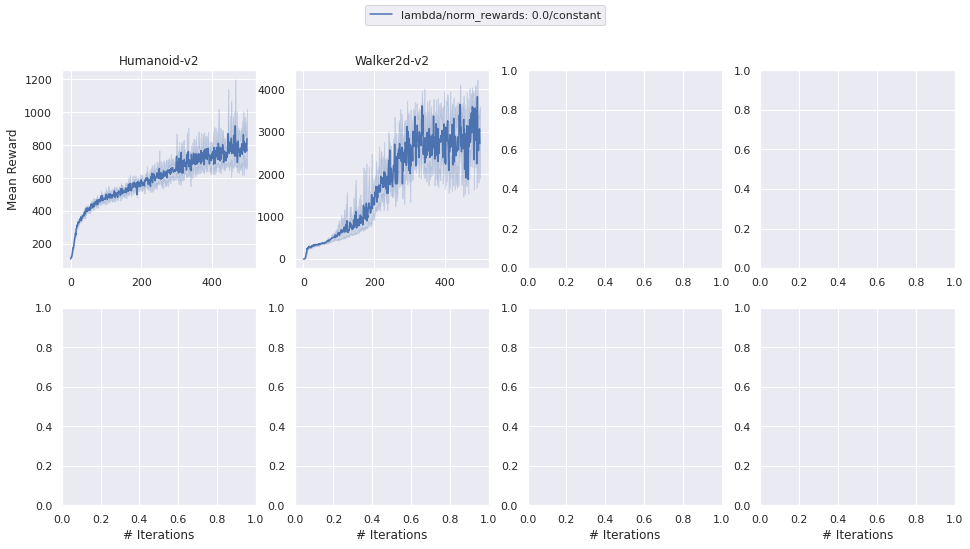

In [27]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for k in code_level_opts['norm_rewards']:
        filt = filter_opts(opt, **{'norm_rewards':k, 'game':g})
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"lambda/norm_rewards: {c}/{k}", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

In [28]:
r = readers.CollectionReader('../src/humanoid/agents')

100%|██████████| 8/8 [00:01<00:00,  5.93it/s]


In [29]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [30]:
games =  ["Humanoid-v2"]
code_level_opts = {
      "kl_penalty_coeff": [0.01, 0.1, 0.3, 0.5],
}

NUM_BINS = 20

In [31]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
constraints = constraints.merge(key_metadata, on='exp_id')
constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

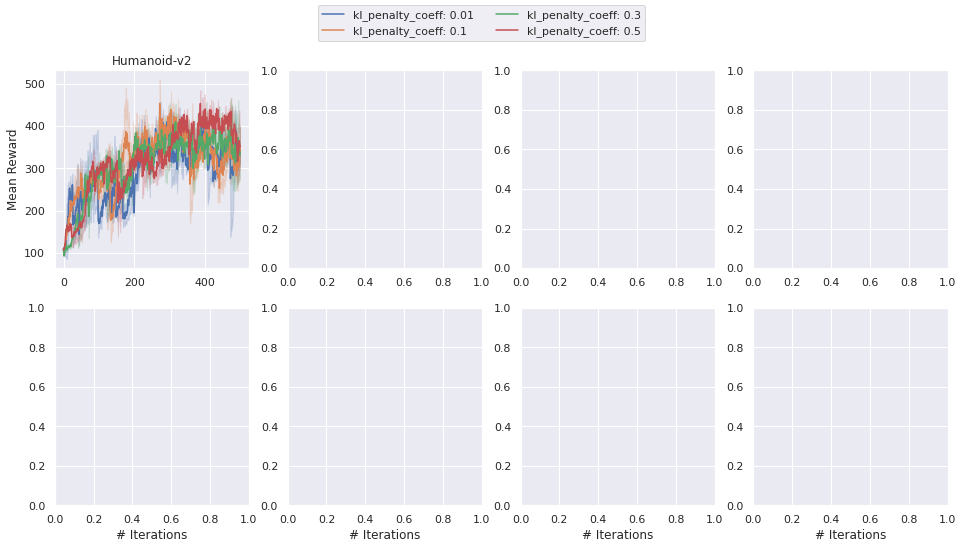

In [32]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for k in code_level_opts['kl_penalty_coeff']:
        filt = filter_opts(opt, **{'kl_penalty_coeff':k, 'game':g})
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"kl_penalty_coeff: {k}", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

In [2]:
r = readers.CollectionReader('../src/reward_const_scale/agents')

100%|██████████| 240/240 [00:21<00:00, 11.32it/s]


In [10]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index

In [11]:
games = ["Walker2d-v2", "Humanoid-v2", "Swimmer-v2", "Hopper-v2",
         "HalfCheetah-v2", "InvertedPendulum-v2", "Reacher-v2",
         "InvertedDoublePendulum-v2"]
code_level_opts = {
      'norm_rewards': ['constant', 'none', 'returns'],
}

NUM_BINS = 20

In [12]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
opt = opt.merge(key_metadata, on='exp_id')

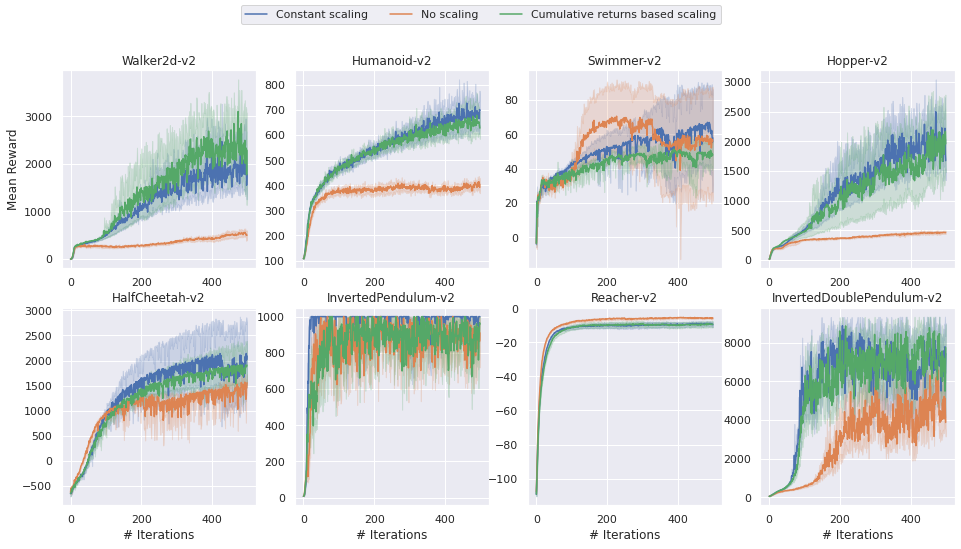

In [14]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for k in code_level_opts['norm_rewards']:
        filt = filter_opts(opt, **{'norm_rewards':k, 'game':g})
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=1000,
                     ax=ax.flatten()[j], label=f"norm_rewards: {k}", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
labels=['Constant scaling', 'No scaling', 'Cumulative returns based scaling']
fig.legend(handles, labels, loc='upper center', ncol=3)

plt.show()

In [7]:
r = readers.CollectionReader('../src/humanoid/agents')

100%|██████████| 252/252 [00:32<00:00,  7.81it/s]


In [8]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [9]:
games =  ["Humanoid-v2"]
code_level_opts = {
    "policy_net_type": ["CtsPolicy", "CtsBetaPolicy"],
      "kl_penalty_coeff": [0.01, 0.1, 3],
      "num_minibatches": [1, 2, 4, 8],
    "ppo_epochs": [10, 20, 30, 40],
    "t": [512, 1000, 2000, 4000],
    "train_steps": [500, 2000],
}

NUM_BINS = 20

In [10]:
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
constraints = constraints.merge(key_metadata, on='exp_id')
constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

(array([20., 17., 44., 49., 62., 39., 17.,  3.,  0.,  1.]),
 array([168.73193773, 227.31466984, 285.89740195, 344.48013407,
        403.06286618, 461.64559829, 520.2283304 , 578.81106251,
        637.39379462, 695.97652673, 754.55925884]),
 <a list of 10 Patch objects>)

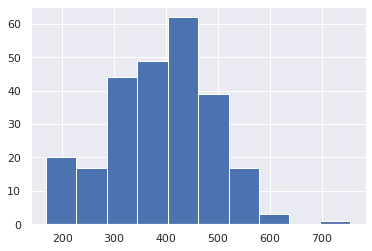

In [18]:
plt.hist(filter_opts(opt, opt_step=499).mean_reward)

(array([3., 3., 4., 4., 2., 4., 3., 3., 4., 6.]),
 array([267.62313704, 298.51908452, 329.41503201, 360.31097949,
        391.20692698, 422.10287446, 452.99882194, 483.89476943,
        514.79071691, 545.6866644 , 576.58261188]),
 <a list of 10 Patch objects>)

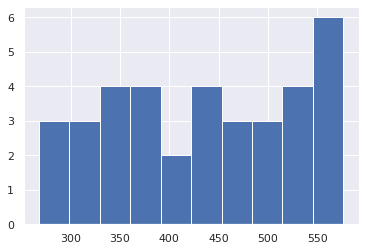

In [37]:
plt.hist(filter_opts(opt, opt_step=1499).mean_reward)

In [34]:
with pd.option_context("display.max_rows", 200, "display.max_columns", 20):
    print(filter_opts(opt, opt_step=499)[filter_opts(opt, opt_step=499).mean_reward > 600])

        mean_reward  final_value_loss  mean_std  \
68999    754.559259          2.767329       NaN   
85499    620.218658          2.072776  0.926496   
149999   609.164913          1.774037       NaN   

                                      exp_id  opt_step         game  \
68999   ba1c3e0a-56dd-4d07-9c2e-c8d570e5e494       499  Humanoid-v2   
85499   2bc20428-cfb4-43bb-bd24-8b1d7aeef665       499  Humanoid-v2   
149999  5d0c07dd-d230-4632-95b4-6ea6e4e7bb50       499  Humanoid-v2   

       policy_net_type  kl_penalty_coeff  num_minibatches  ppo_epochs     t  \
68999    CtsBetaPolicy               3.0                2          20   512   
85499        CtsPolicy               3.0                1          10  4000   
149999   CtsBetaPolicy               0.1                8          10  4000   

        train_steps  
68999          2000  
85499           500  
149999          500  


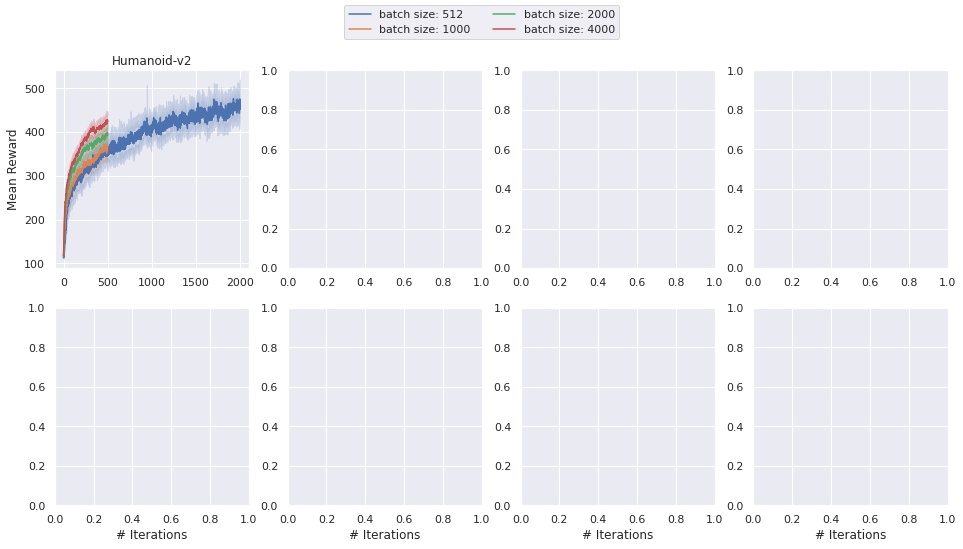

In [24]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for k in code_level_opts['t']:
        filt = filter_opts(opt, t=k, game=g)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"batch size: {k}", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

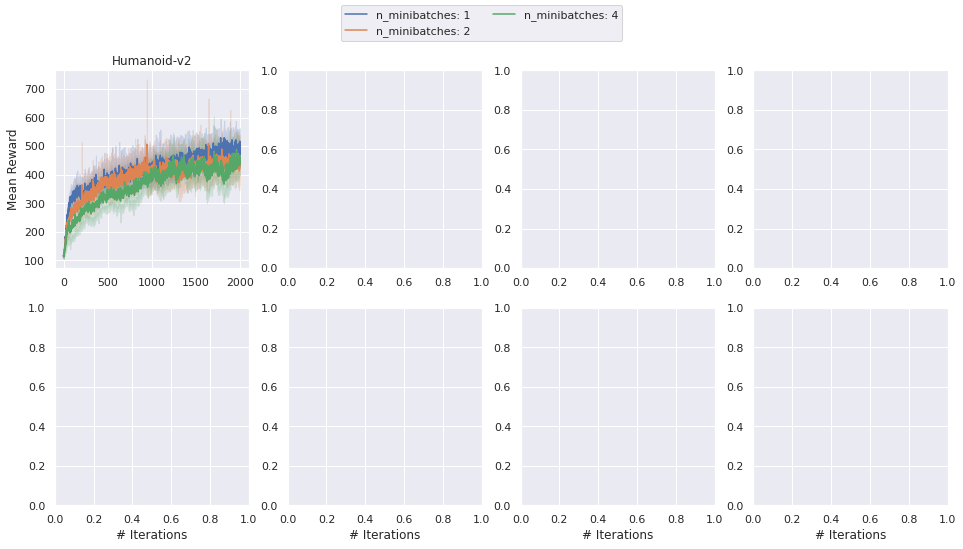

In [38]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for k in code_level_opts['num_minibatches']:
        filt = filter_opts(opt, num_minibatches=k, game=g, train_steps=2000)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"n_minibatches: {k}", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

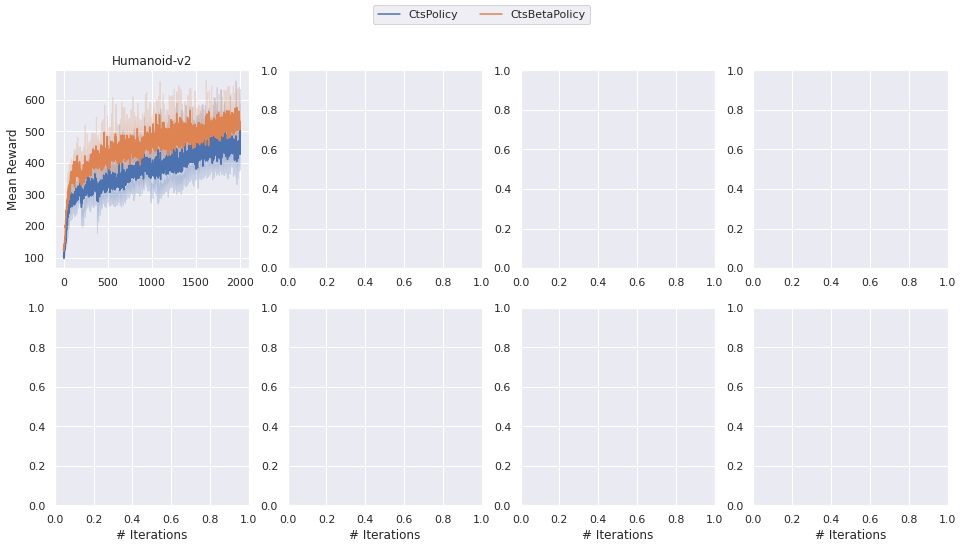

In [47]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for k in code_level_opts['policy_net_type']:
        filt = filter_opts(opt, policy_net_type=k, game=g, train_steps=2000, num_minibatches=1)
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"{k}", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()

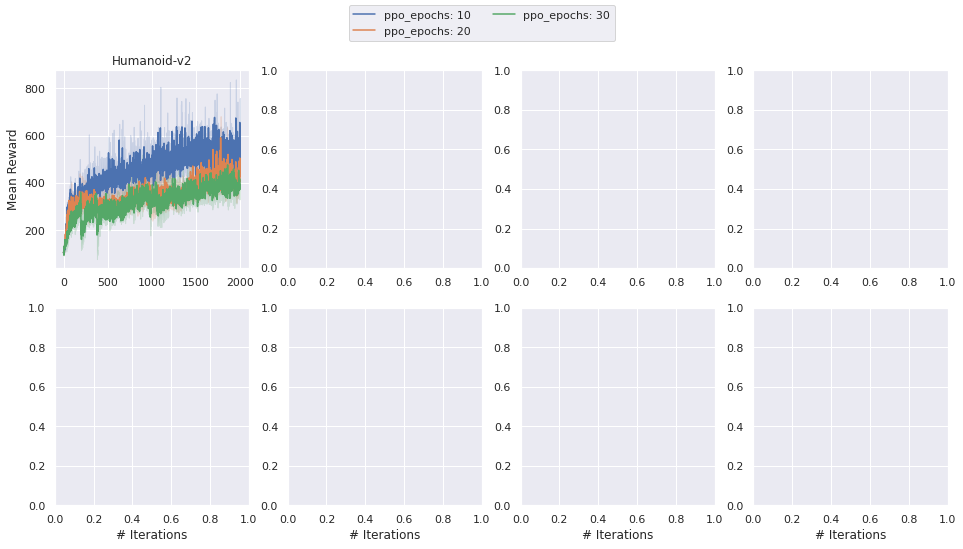

In [45]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for k in code_level_opts['ppo_epochs']:
        filt = filter_opts(opt, ppo_epochs=k, game=g, train_steps=2000, num_minibatches=1,
                           policy_net_type='CtsPolicy')
        sns.lineplot(filt.opt_step, filt.mean_reward, n_boot=100,
                     ax=ax.flatten()[j], label=f"ppo_epochs: {k}", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.show()